In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from Engine import *
from util import *
from matplotlib import pyplot as plt



Using device: cuda


In [3]:
# train vanilla version
default_opts['nn_opts']['basic'] = True
default_opts['nn_opts']['p'] = 2
eng = Engine(default_opts)

In [4]:
eng.setup_data()

In [5]:

eng.solve()

{
  "exact_D": 2.0,
  "model_dir": "model",
  "nn_opts": {
    "basic": true,
    "depth": 3,
    "init_D": 1.0,
    "p": 2,
    "use_resnet": false,
    "width": 64
  },
  "noise_opts": {
    "length_scale": 0.0,
    "use_noise": false,
    "variance": 0.01
  },
  "train_opts": {
    "lr": 0.001,
    "max_iter": 100000,
    "print_every": 100,
    "tolerance": 0.001
  },
  "traintype": "vanilla"
}
Epoch 0, PDE: 744, Data: 0.12, Total: 744, D: 0.999
Epoch 100, PDE: 205, Data: 0.000867, Total: 205, D: 1.13
Epoch 200, PDE: 151, Data: 0.0227, Total: 151, D: 1.15
Epoch 300, PDE: 142, Data: 0.0276, Total: 142, D: 1.13
Epoch 400, PDE: 120, Data: 0.0376, Total: 120, D: 1.1
Epoch 500, PDE: 54, Data: 0.0604, Total: 54.1, D: 1.09
Epoch 600, PDE: 21, Data: 0.0704, Total: 21.1, D: 1.09
Epoch 700, PDE: 12.1, Data: 0.0702, Total: 12.2, D: 1.11
Epoch 800, PDE: 7.07, Data: 0.0686, Total: 7.14, D: 1.12
Epoch 900, PDE: 4.43, Data: 0.0663, Total: 4.49, D: 1.13
Epoch 1000, PDE: 2.81, Data: 0.064, Total: 2

KeyboardInterrupt: 

final D: 1.83742356300354


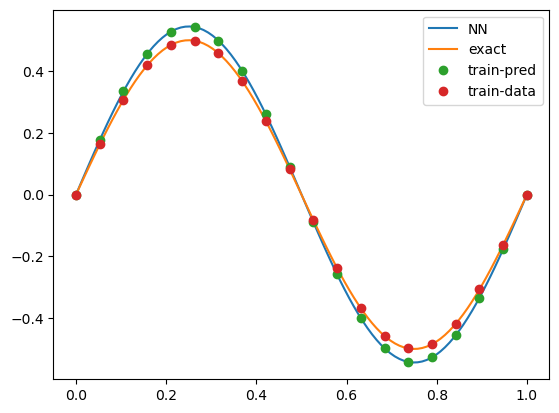

In [ ]:
x_test = torch.linspace(0, 1, 100).view(-1, 1).to(device)

u_test = eng.net(x_test)
u_init_test = eng.net.u_init(x_test)
u_exact_test = eng.net.u_exact(x_test, eng.opts['exact_D'])

x_res_train = eng.dataset['x_res_train'].detach()
u_pred = eng.net(x_res_train).detach()
u_res = eng.dataset['u_res_train'].detach()


# visualize the results
plt.figure()

plt.plot(x_test.cpu().numpy(), u_test.cpu().detach().numpy(), label='NN')
# plt.plot(x_test.cpu().numpy(), u_init_test.cpu().numpy(), label='init')
plt.plot(x_test.cpu().numpy(), u_exact_test.cpu().numpy(), label='exact')

plt.plot(x_res_train.cpu().numpy(), u_pred.cpu().numpy(), 'o', label='train-pred')
plt.plot(x_res_train.cpu().numpy(), u_res.cpu().numpy(), 'o', label='train-data')


plt.legend(loc="upper right")
print(f'final D: {eng.net.D.item()}')
